# Setup
We need datasets, dataloaders, and code to train and evaluate models

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [17]:
import os
import sys
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)
from models import *
from data_structures import *
from helpers import load_from_hdf5

In [18]:
X, y = load_from_hdf5(filename="../../engine_windows_sample_scaled.h5")

In [19]:
threshold = 20
idxs = np.where(y < threshold)[0]
X = X[idxs]
y = y[idxs]

In [20]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

# 1d CNN
First, let's try a one dimensional CNN to capture temporal relationships within each feature.

In [ ]:
train_loader, test_loader = create_train_test_dataloaders(X, y)

In [ ]:
num_feats = 44
model = CNNRULRegression(num_features=num_feats).to(device)
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20 

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

In [ ]:
plot_loss(history)

In [ ]:
plot_rul_predictions(model, test_loader, device)

# 2d CNN
Now, let's try out a two dimensional CNN to capture interactions among features.

In [ ]:
train_loader, test_loader = create_train_test_dataloaders(X, y, dim="2d")

In [ ]:
num_feats = 44
model = CNNRUL2DRegression(num_features=num_feats).to(device)
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 15 

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

In [ ]:
plot_loss(history)

In [ ]:
plot_rul_predictions(model, test_loader, device)

# Hybrid CNN
Now, let's try a hybrid CNN that uses both 1d and 2d convolutions.

In [21]:
train_loader, test_loader = create_train_test_dataloaders(X, y)

In [22]:
num_feats = 33
seq_length = 50  
model = HybridCNNRegression(num_features=num_feats, seq_length=seq_length).to(device)
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 30

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/30, Train Loss: 38.2443, Test Loss: 33.2568
Epoch 2/30, Train Loss: 33.1478, Test Loss: 32.7345
Epoch 3/30, Train Loss: 32.6565, Test Loss: 32.2160
Epoch 4/30, Train Loss: 32.1000, Test Loss: 31.6187
Epoch 5/30, Train Loss: 31.4588, Test Loss: 30.9655
Epoch 6/30, Train Loss: 30.7164, Test Loss: 30.1731
Epoch 7/30, Train Loss: 29.8723, Test Loss: 29.2142
Epoch 8/30, Train Loss: 28.8390, Test Loss: 28.0485
Epoch 9/30, Train Loss: 27.4856, Test Loss: 26.6188
Epoch 10/30, Train Loss: 26.0399, Test Loss: 25.2008
Epoch 11/30, Train Loss: 24.5560, Test Loss: 23.7755
Epoch 12/30, Train Loss: 23.0237, Test Loss: 22.1256
Epoch 13/30, Train Loss: 21.4397, Test Loss: 20.6935
Epoch 14/30, Train Loss: 19.8736, Test Loss: 19.3730
Epoch 15/30, Train Loss: 18.4064, Test Loss: 17.6721
Epoch 16/30, Train Loss: 17.0613, Test Loss: 16.5056
Epoch 17/30, Train Loss: 15.8870, Test Loss: 15.4618
Epoch 18/30, Train Loss: 14.8928, Test Loss: 14.5132
Epoch 19/30, Train Loss: 14.0628, Test Loss: 13.6689
Ep

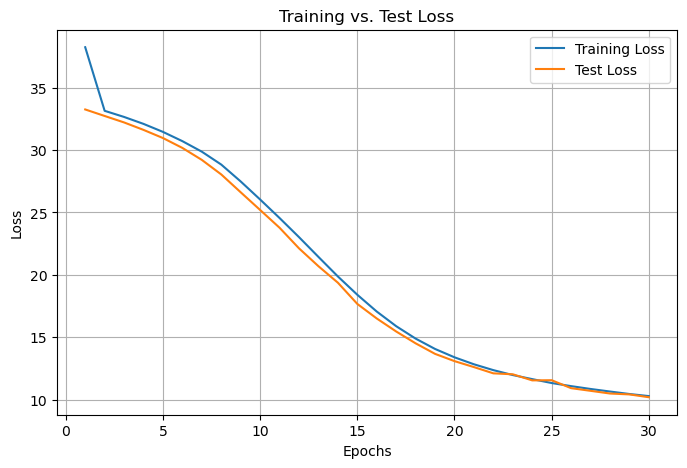

In [23]:
plot_loss(history)

In [24]:
plot_rul_predictions(model, test_loader, device)

TypeError: get_predict_and_true() takes 2 positional arguments but 3 were given

# More Complex Hybrid Model
The model's loss dropping drastically and then remaining stable might indicate underfitting. So, let's try adding additional convolutional layers.

In [ ]:
num_feats = 44
seq_length = 50  
model = ComplexHybridCNNRegression(num_features=num_feats, seq_length=seq_length).to(device)
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 15

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

In [ ]:
plot_loss(history)

In [ ]:
plot_rul_predictions(model, test_loader, device)

# Temporal CNN
Our more complex hybrid CNN was massively overfitting, so let's go in a different direction. Let's try a temporal CNN instead. 

In [ ]:
num_feats = 44
seq_length = 50
model = TCNRegression(num_features=num_feats, seq_length=seq_length).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)
plot_loss(history)

In [ ]:
plot_rul_predictions(model, test_loader, device)